In [1]:
from qibolab import Platform
import diagnostics
from qibolab.calibration import utils

[Qibo 0.1.8.dev1|INFO|2022-05-30 16:30:58]: Using numpy backend on /CPU:0
[Qibo 0.1.8.dev1|WARNING|2022-05-30 16:30:58]: numpy backend uses `np.einsum` and supports CPU only. Consider installing the qibojit or qibotf backends for increased performance and to enable GPU acceleration.


In [2]:
# Create a platform; connect and configure it
platform = Platform('tiiq')
platform.connect()
platform.setup()

# create a diagnostics object
ds = diagnostics.Diagnostics(platform)

# Characterisation can be done by changing settings to qibolab/runcards/tiiq.yml and diagnostics.yml

[Qibo 0.1.8.dev1|INFO|2022-05-30 16:30:59]: Loading platform tiiq
[Qibo 0.1.8.dev1|INFO|2022-05-30 16:30:59]: Loading runcard c:\users\david fuentes ruiz\github\qibolab\src\qibolab\runcards\tiiq.yml
[Qibo 0.1.8.dev1|INFO|2022-05-30 16:30:59]: Connecting to tiiq instruments.


Connected to: Rohde&Schwarz SGS100A (serial:1416.0505k02/113301, firmware:4.2.76.0-4.30.046.295) in 1.13s
Connected to: Rohde&Schwarz SGS100A (serial:1416.0505k02/113300, firmware:4.2.76.0-4.30.046.295) in 1.06s


In [ ]:
utils.backup_config_file(platform)

Resonator Spectroscopy

In [ ]:

resonator_freq, avg_min_voltage, max_ro_voltage, smooth_dataset, dataset = ds.run_resonator_spectroscopy()

In [ ]:
#save resonator params
print(utils.get_config_parameter("settings", "", "resonator_freq"))
utils.save_config_parameter("settings", "", "resonator_freq", float(resonator_freq))

print(utils.get_config_parameter("settings", "", "resonator_spectroscopy_avg_min_ro_voltage"))
utils.save_config_parameter("settings", "", "resonator_spectroscopy_avg_min_ro_voltage", float(avg_min_voltage))

print(utils.get_config_parameter("settings", "", "resonator_spectroscopy_max_ro_voltage"))
utils.save_config_parameter("settings", "", "resonator_spectroscopy_max_ro_voltage", float(max_ro_voltage))

print(utils.get_config_parameter("LO_QRM_settings", "", "frequency"))
utils.save_config_parameter("LO_QRM_settings", "", "frequency", float(resonator_freq - 20_000_000))


Qubit Spectroscopy

In [ ]:
qubit_freq, min_ro_voltage, smooth_dataset, dataset = ds.run_qubit_spectroscopy()

In [ ]:
#save qubit frequency founded - update LO_QCM freq + update qubit spec min voltage
print(utils.get_config_parameter("settings", "", "qubit_freq"))
utils.save_config_parameter("settings", "", "qubit_freq", float(qubit_freq))

print(utils.get_config_parameter("LO_QCM_settings", "", "frequency"))
utils.save_config_parameter("LO_QCM_settings", "", "frequency", float(qubit_freq + 200_000_000))

print(utils.get_config_parameter("settings", "", "qubit_spectroscopy_min_ro_voltage"))
utils.save_config_parameter("settings", "", "qubit_spectroscopy_min_ro_voltage", float(min_ro_voltage))

Rabi Oscillations with varying pulse length

In [ ]:
dataset, pi_pulse_duration, pi_pulse_amplitude, pi_pulse_gain, rabi_oscillations_pi_pulse_min_voltage, t1 = ds.run_rabi_pulse_length()

In [ ]:
#save pi pulse params founded + pi pulse min vol + T1
print(utils.get_config_parameter("settings", "", "pi_pulse_duration"))
utils.save_config_parameter("settings", "", "pi_pulse_duration", int(pi_pulse_duration))

print(utils.get_config_parameter("settings", "", "pi_pulse_amplitude"))
utils.save_config_parameter("settings", "", "pi_pulse_amplitude", float(pi_pulse_amplitude))

print(utils.get_config_parameter("settings", "", "pi_pulse_gain"))
utils.save_config_parameter("settings", "", "pi_pulse_gain", float(pi_pulse_gain))

print(utils.get_config_parameter("settings", "", "rabi_oscillations_pi_pulse_min_voltage"))
utils.save_config_parameter("settings", "", "rabi_oscillations_pi_pulse_min_voltage", float(rabi_oscillations_pi_pulse_min_voltage))

print(utils.get_config_parameter("settings", "", "T1"))
#TODO: Double check T1 obtained from Rabi. It is not correct.
#utils.save_config_parameter("settings", "", "T1", float(t1))

T1

In [ ]:
t1, smooth_dataset, dataset = ds.run_t1()

Ramsey

In [ ]:
t2, smooth_dataset, dataset = ds.run_ramsey()

Spin Echo

In [ ]:
dataset = ds.run_spin_echo()

In [ ]:
#Run Spin Echo 3 Pulses
dataset = ds.run_spin_echo_3pulses()
#TODO: The result of the plot does not match with the expected result
#        it should result in state |0> and it seems to give state |1>

Qubit states classification

In [ ]:
all_gnd_states, mean_gnd_states, all_exc_states, mean_exc_states = ds.callibrate_qubit_states()

In [ ]:
#utils.save_config_parameter("settings", "", "mean_exc_states", complex(mean_exc_states))
#utils.save_config_parameter("settings", "", "mean_gnd_states", complex(mean_gnd_states))

In [ ]:
utils.plot_qubit_states(all_gnd_states, all_exc_states)

#Classify all points into 0 and 1
classified_gnd_results = []
for point in all_gnd_states: 
    classified_gnd_results.append(utils.classify(point, mean_gnd_states, mean_exc_states))

classified_exc_results = []
for point in all_exc_states:
    classified_exc_results.append(utils.classify(point, mean_gnd_states, mean_exc_states))

print(classified_gnd_results)
print(classified_exc_results)

Ramsey_freq

Starting iterative measurement...


c:\Anaconda\envs\Quantum\lib\site-packages\pyqtgraph\graphicsItems\ScatterPlotItem.py:974: RuntimeWarning: All-NaN slice encountered
  self.bounds[ax] = (np.nanmin(d) - self._maxSpotWidth*0.7072, np.nanmax(d) + self._maxSpotWidth*0.7072)
c:\Anaconda\envs\Quantum\lib\site-packages\pyqtgraph\graphicsItems\ScatterPlotItem.py:974: RuntimeWarning: All-NaN slice encountered
  self.bounds[ax] = (np.nanmin(d) - self._maxSpotWidth*0.7072, np.nanmax(d) + self._maxSpotWidth*0.7072)
c:\Anaconda\envs\Quantum\lib\site-packages\pyqtgraph\graphicsItems\ScatterPlotItem.py:974: RuntimeWarning: All-NaN slice encountered
  self.bounds[ax] = (np.nanmin(d) - self._maxSpotWidth*0.7072, np.nanmax(d) + self._maxSpotWidth*0.7072)
c:\Anaconda\envs\Quantum\lib\site-packages\pyqtgraph\graphicsItems\ScatterPlotItem.py:974: RuntimeWarning: All-NaN slice encountered
  self.bounds[ax] = (np.nanmin(d) - self._maxSpotWidth*0.7072, np.nanmax(d) + self._maxSpotWidth*0.7072)
c:\Anaconda\envs\Quantum\lib\site-packages\pyqtg

100% completed | elapsed time:    198s | time left:      0s  
100% completed | elapsed time:    198s | time left:      0s  
Delta artificial = 2000000.0

Delta Fitting = 0.12191605450630386

Delta Phys = 119916054.50630386

T2 = 10104.280540862557 ns
Updating qubit_freq from: 5082221756to: 5202137810.506304
Saved value: 5202137810.506304
Updating LO_QCM from: 5282221756to: 5402137810.506304
Saved value: 5402137810.506304
Starting iterative measurement...


c:\Anaconda\envs\Quantum\lib\site-packages\pyqtgraph\graphicsItems\ScatterPlotItem.py:974: RuntimeWarning: All-NaN slice encountered
  self.bounds[ax] = (np.nanmin(d) - self._maxSpotWidth*0.7072, np.nanmax(d) + self._maxSpotWidth*0.7072)
c:\Anaconda\envs\Quantum\lib\site-packages\pyqtgraph\graphicsItems\ScatterPlotItem.py:974: RuntimeWarning: All-NaN slice encountered
  self.bounds[ax] = (np.nanmin(d) - self._maxSpotWidth*0.7072, np.nanmax(d) + self._maxSpotWidth*0.7072)
c:\Anaconda\envs\Quantum\lib\site-packages\pyqtgraph\graphicsItems\ScatterPlotItem.py:974: RuntimeWarning: All-NaN slice encountered
  self.bounds[ax] = (np.nanmin(d) - self._maxSpotWidth*0.7072, np.nanmax(d) + self._maxSpotWidth*0.7072)
c:\Anaconda\envs\Quantum\lib\site-packages\pyqtgraph\graphicsItems\ScatterPlotItem.py:974: RuntimeWarning: All-NaN slice encountered
  self.bounds[ax] = (np.nanmin(d) - self._maxSpotWidth*0.7072, np.nanmax(d) + self._maxSpotWidth*0.7072)
c:\Anaconda\envs\Quantum\lib\site-packages\pyqtg

100% completed | elapsed time:    198s | time left:      0s  
100% completed | elapsed time:    198s | time left:      0s  
Delta artificial = 2000000.0

Delta Fitting = 0.0007490439555900177

Delta Phys = -1250956.0444099824

T2 = 751.0187290880502 ns
Updating qubit_freq from: 5202137810.506304to: 5200886854.461894
Saved value: 5200886854.461894
Updating LO_QCM from: 5402137810.506304to: 5400886854.461894
Saved value: 5400886854.461894


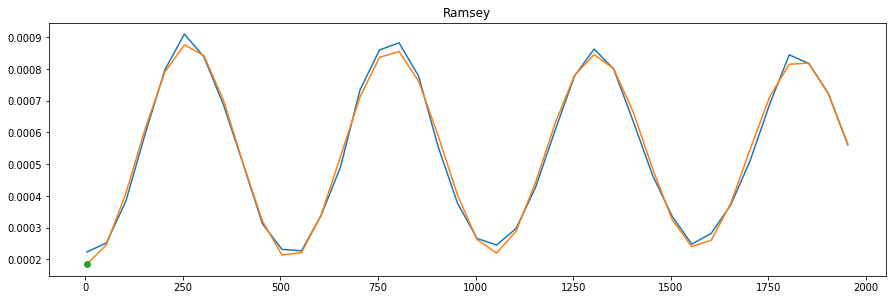

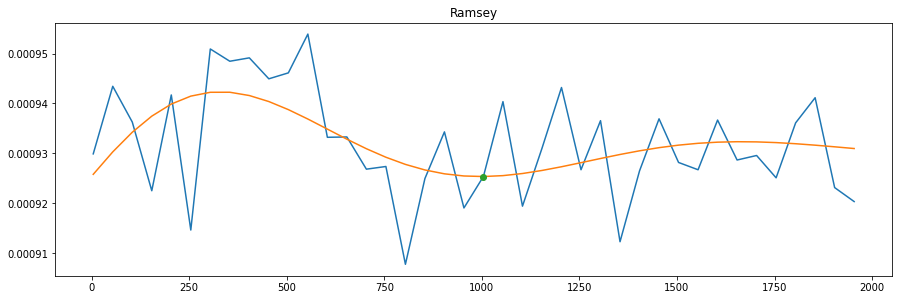

In [3]:
#Modify runcard qc_freq and QCM_freq when algorithm ready 
t2, last_delta_phys, smooth_dataset, dataset = ds.run_ramsey_freq()


In [5]:
print("T2 obtained from Ramsey: " + str(t2))
print("Last delta_phys obtained from Ramsey: " + str(last_delta_phys))

T2 obtained from Ramsey751.0187290880502
Last delta_phys obtained from Ramsey-1250956.0444099824
